# Brain Tumor Classification (MRI)

MRI (Magnetic Resonance Imaging) to metoda diagnostyczna wykorzystująca silne pola magnetyczne i fale radiowe do uzyskania szczegółowych obrazów wnętrza ciała.

Podczas badania MRI pacjent zostaje umieszczony wewnątrz aparatu MRI, który generuje silne pole magnetyczne. Następnie emitowane są fale radiowe, które oddziałują z atomami wodorkowymi w tkankach ciała. Te reakcje są rejestrowane przez urządzenie, a komputer tworzy z nich obrazy przekrojów ciała w różnych płaszczyznach.

MRI jest szczególnie przydatne w diagnozowaniu chorób i urazów mózgu, rdzenia kręgowego, kości, stawów i tkanek miękkich, takich jak mięśnie, ścięgna i więzadła. MRI jest bezpieczną metodą diagnostyczną, nie wykorzystującą promieniowania jonizującego, co oznacza, że nie powoduje szkodliwych skutków ubocznych.

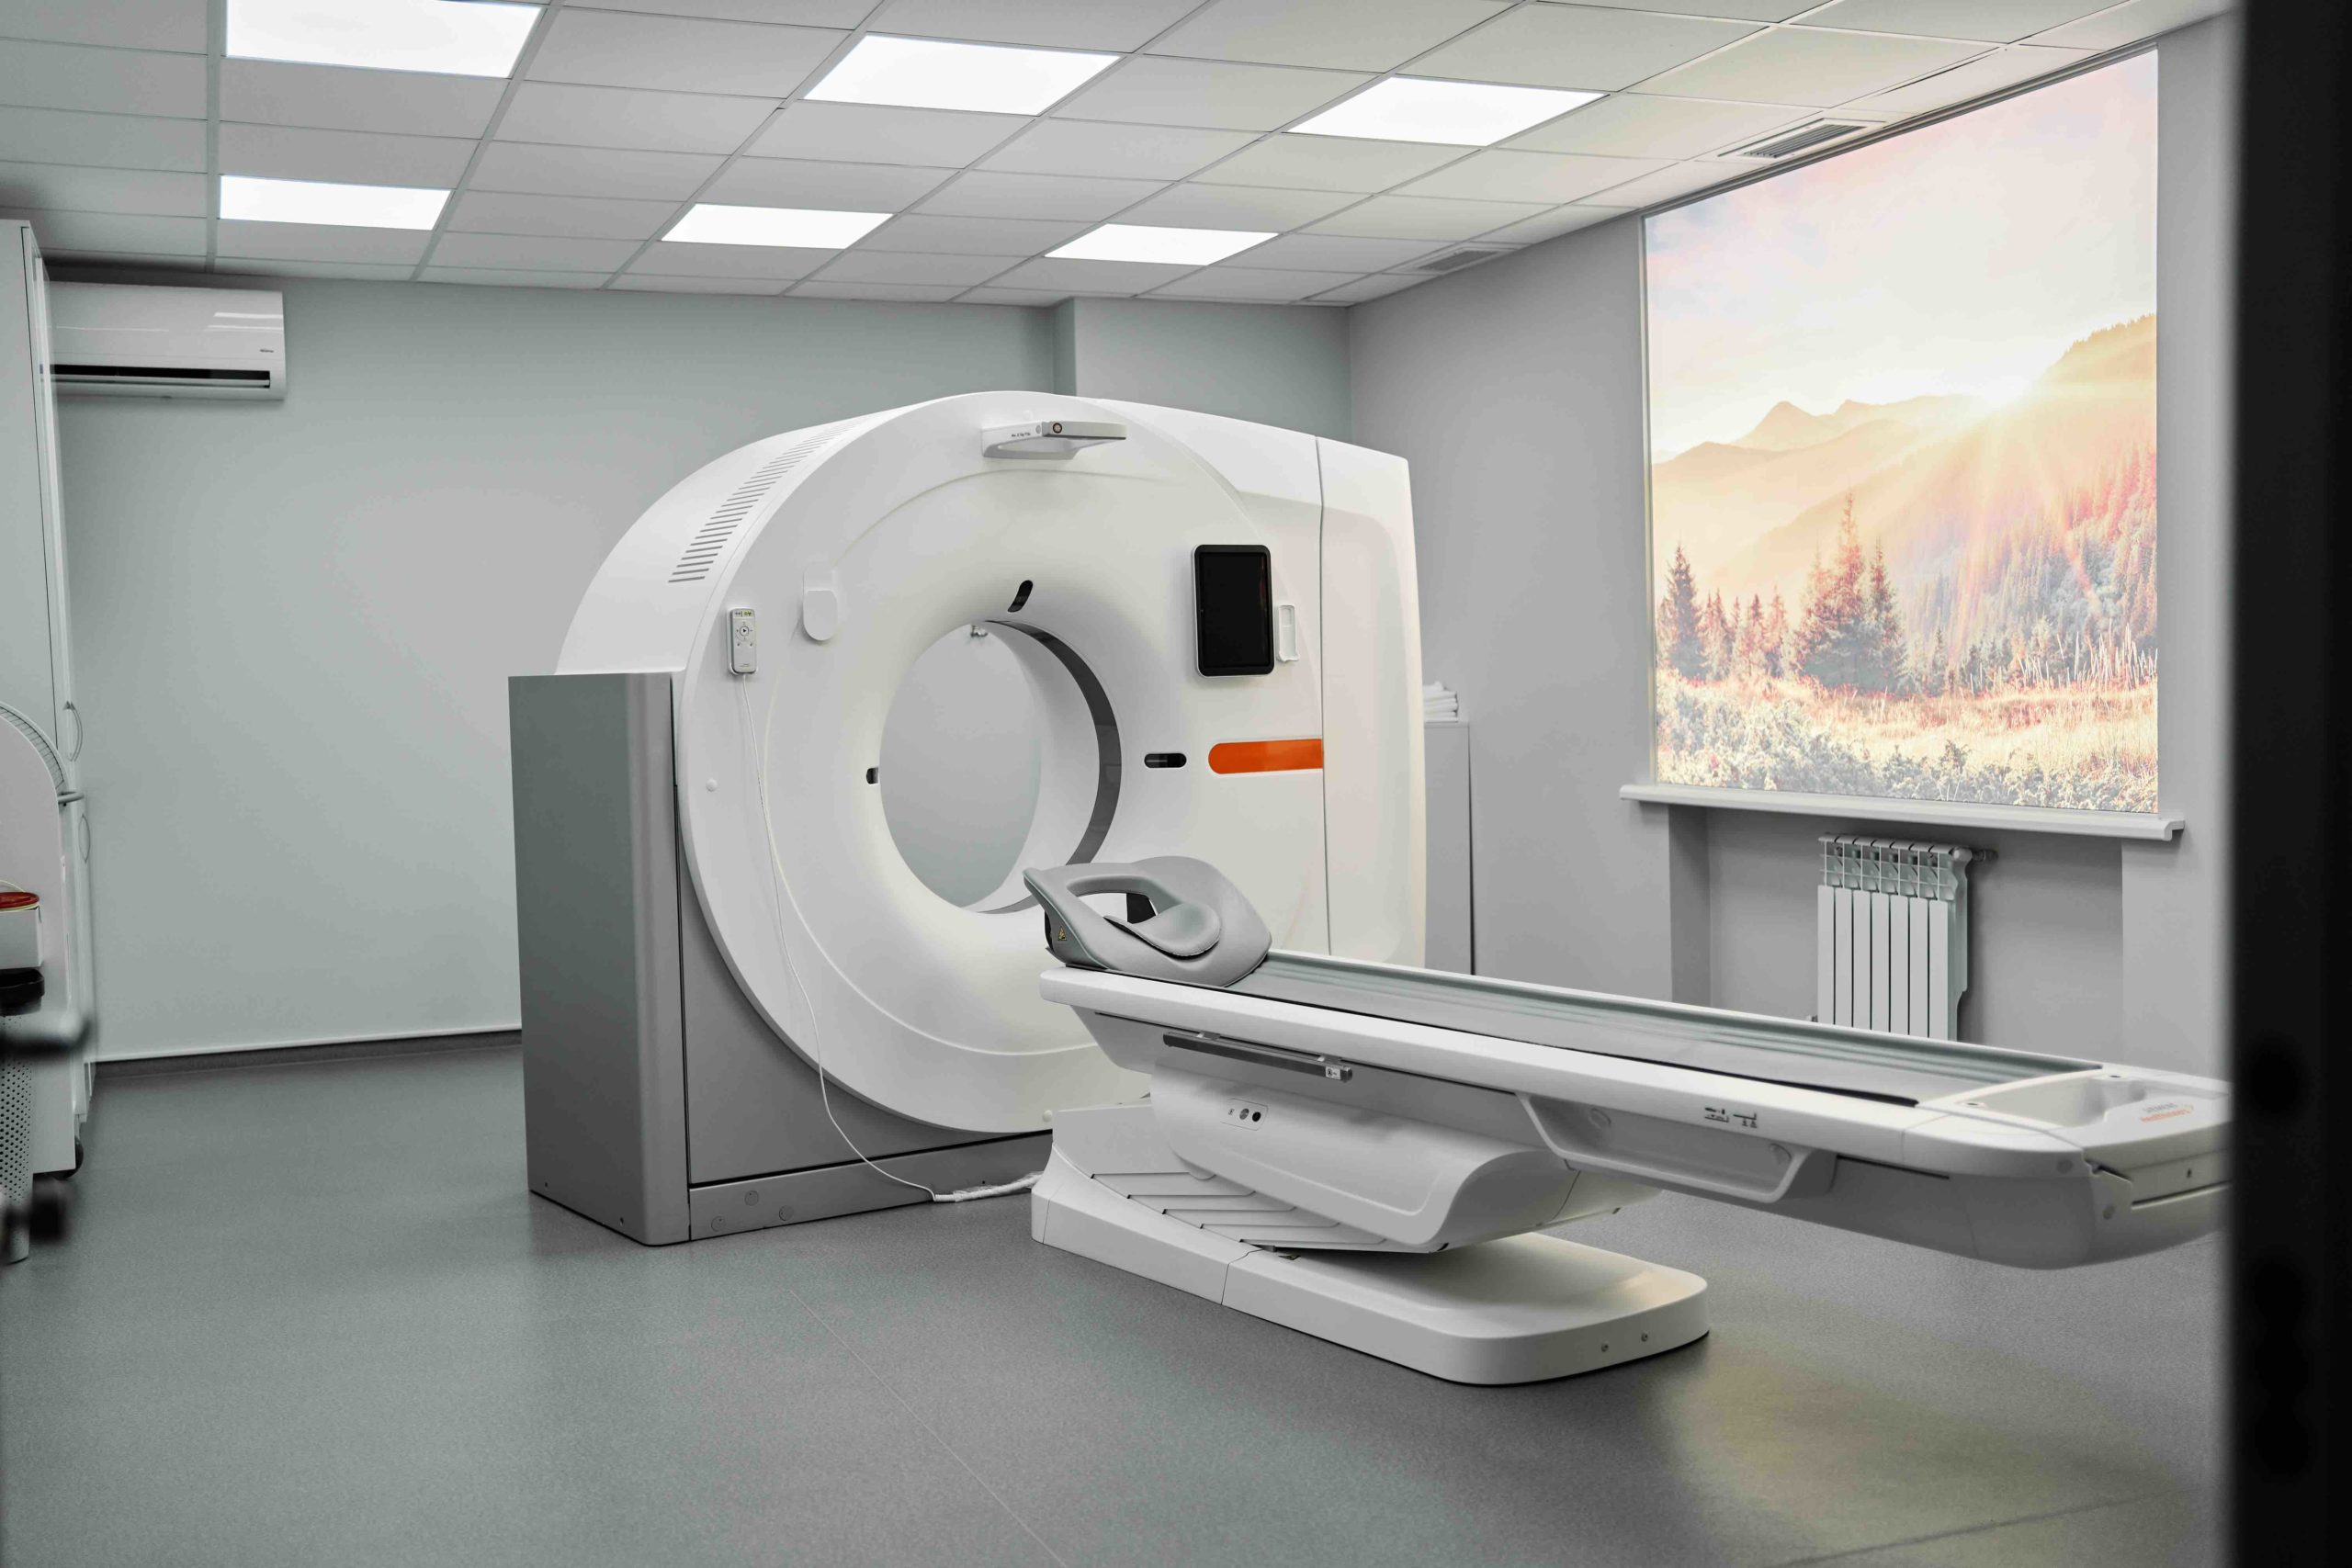

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, AUC
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

In [ ]:
train_path = 'data/MRI/Training/'
test_path = 'data/MRI/Testing/'

In [ ]:
# Zbuduj Image Data Generator dla zbioru treningowego i walidacyjnego
train_datagen = ___

validation_datagen = ___

In [ ]:
# Zbuduje flow dla zbioru treningowego i testowego
train_flow = ___

validation_flow = ___

In [ ]:
sample_batch = train_flow.next()
for i in range(0, 32):
    img = sample_batch[0][i, :, : , :]
    plt.matshow(img)
plt.show()

In [ ]:
# Załaduj model ResNet
resnet_v2 = ___

In [ ]:
model = resnet_v2.output
model = GlobalAveragePooling2D()(model)
model = Dropout(rate=0.55)(model)
model = Dense(60,activation='elu', kernel_initializer='GlorotNormal')(model)
model = Dropout(rate=0.3)(model)
model = Dense(4,activation='softmax')(model)
model = Model(inputs=resnet_v2.input, outputs = model)
model.summary()

In [ ]:
opt = Adam(
    learning_rate=0.000016, beta_1=0.91, beta_2=0.9994,
    epsilon=1e-08)
model.compile(loss='categorical_crossentropy',optimizer = opt, metrics= ['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir = "logs/MRI/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='max', verbose=1)
# Dodaj Early Storrping i Model Checkpoint
early_stopping_cb = ___
checkpoint = ___

In [ ]:
# Wytrenuj model
history = ___

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(validation_flow)
y_pred=np.argmax(y_pred, axis=1)
yyy_test = validation_flow.classes

In [ ]:
print(classification_report(yyy_test, y_pred))